# Логарифмическая регрессия: ([source](https://math.libretexts.org/Sandboxes/Jaison_Novick/1250_Draft_3/06%3A_Exponential_and_Logarithmic_Functions/6.09%3A_Exponential_and_Logarithmic_Regressions))

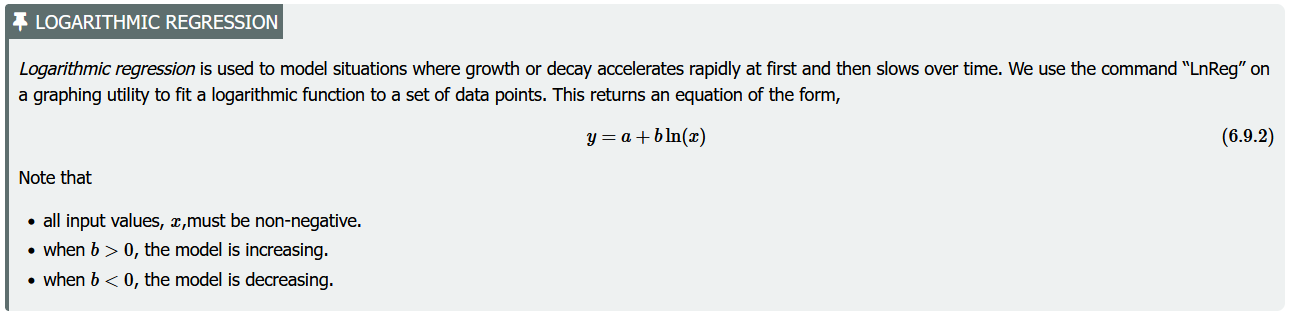

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

# создание данных
x_t = np.linspace(0.1, 5, 100)  # 100 значений от 0.1 до 5
a = 2.0
b = 0.2
y_t = a * np.log(x_t) + b

# шум (epsilon из пары)
df = 3  # кол. степеней свободы
noise = np.random.standard_t(df, size=100)
scale = 0.3  # масштаб шума
y_noisy = y_t + scale * noise

x = x_t
y = y_noisy

In [ ]:
np.mean(noise)

-0.0014884116007059167

In [ ]:
# Рассчет дисперсии
var_y_t = np.var(y_t)
var_noise = np.var(noise)
var_y = np.var(y)

print("Дисперсия y_t:", var_y_t)
print("Дисперсия noise:", var_noise)
print("Дисперсия y (y_t + noise):", var_y)

Дисперсия y_t: 2.903267562307323
Дисперсия noise: 2.2090834076053723
Дисперсия y (y_t + noise): 3.063342118443345


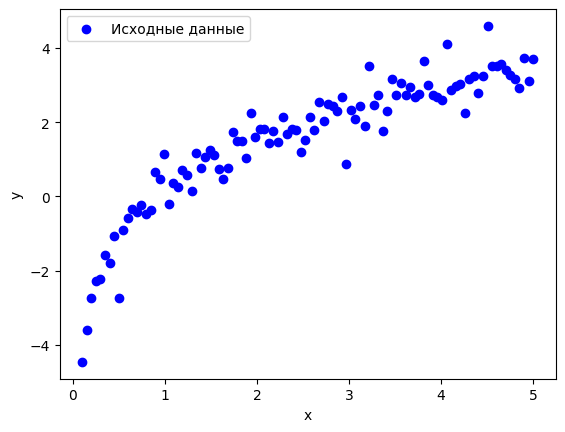

In [ ]:
plt.scatter(x, y, label='Исходные данные', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Модель по исходным данным (итерационно):

a: 1.9866546012225896
b: 0.20860853759576145
y = 1.987 ln(x) + 0.209
S = 19.868825436966592


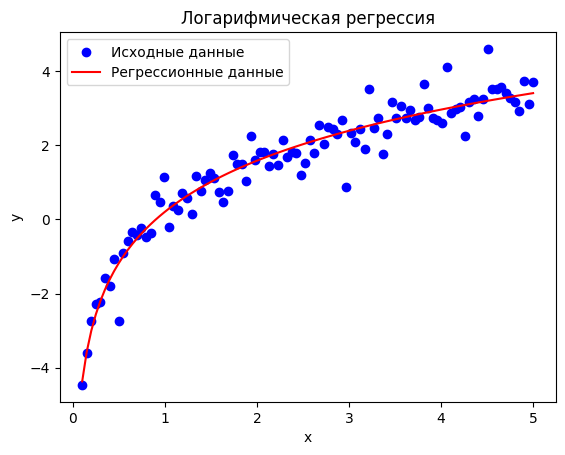

In [ ]:
import numpy as np

def regression_function(x, a, b):
    return a * np.log(x) + b

a, b = 1.0, 1.0      # начальные приближения для a и b

eps = 1e-6           # точность
max_iterations = 100 # предел итераций

n = len(x)

for _ in range(max_iterations):
    a_new = (np.sum(y * np.log(x)) - b * np.sum(np.log(x))) / np.sum(np.log(x)**2)
    b_new = (np.sum(y) - a_new * np.sum(np.log(x))) / n

    if np.abs(a_new - a) < eps and np.abs(b_new - b) < eps:
        break
    a = a_new
    b = b_new

S = np.sum((y - (a * np.log(x) + b))**2)

print("a:", a)
print("b:", b)
print(f"y = {np.round(a, 3)} ln(x) + {np.round(b, 3)}")
print("S =", S)

# регрессионные значения
regression_values = regression_function(x, a, b)

# графики
plt.scatter(x, y, label='Исходные данные', color='blue')
plt.plot(x, regression_values, label='Регрессионные данные', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Логарифмическая регрессия')
plt.show()

Используя minimize:

a = 1.986655392528268
b = 0.20860799747778966
Сумма квадратов ошибок = 19.868825436920535


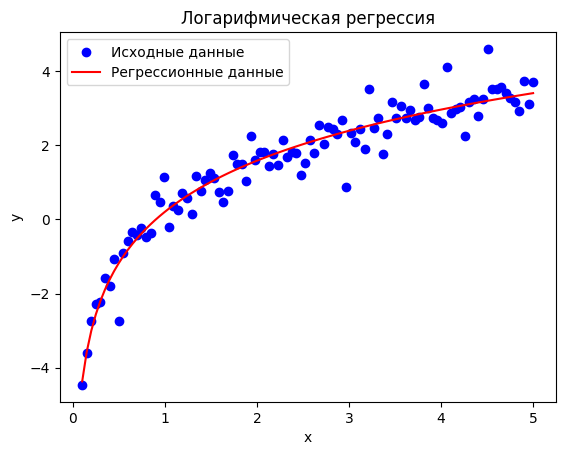

In [ ]:
from scipy.optimize import minimize

# функция потерь с помощью суммы частных
def loss(params):
    a, b = params
    da = -2 * np.sum((y - (a * np.log(x) + b)) * np.log(x))
    db = -2 * np.sum(y - (a * np.log(x) + b))
    return da**2 + db**2

guess = [1.0, 1.0]

# Минимизация функции потерь
result = minimize(loss, guess, method='L-BFGS-B')
a_opt, b_opt = result.x

# переопределение функции потерь, чтобы получить сумму квадратов ошибок
def loss(params):
    a, b = params
    predicted_y = a * np.log(x) + b
    error = y - predicted_y
    return np.sum(error**2)

f_loss = loss([a_opt, b_opt])

print("a =", a_opt)
print("b =", b_opt)
print("Сумма квадратов ошибок =", f_loss)

# регрессионные значения
regression_values = regression_function(x, a_opt, b_opt)

# графики
plt.scatter(x, y, label='Исходные данные', color='blue')
plt.plot(x, regression_values, label='Регрессионные данные', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Логарифмическая регрессия')
plt.show()

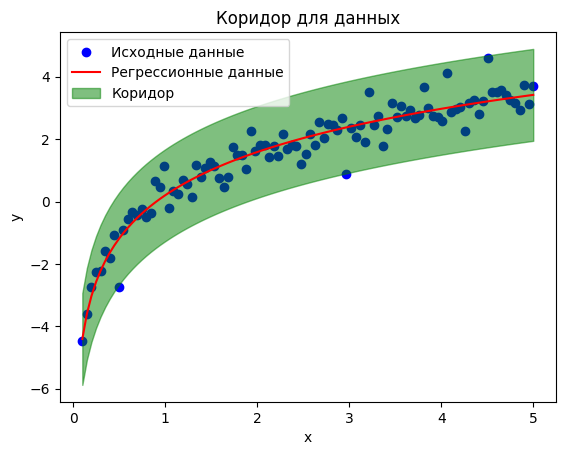

In [ ]:
from scipy.stats import norm

# ср. кв. отколнение
std_dev = np.std(y)
conf_level = 0.6 # 0.95

# квантили для верхней и нижней границы коридора
alpha = 1 - conf_level
upper_limit = y_t + std_dev * norm.ppf(1 - alpha / 2)
lower_limit = y_t - std_dev * norm.ppf(1 - alpha / 2)

plt.scatter(x, y, label='Исходные данные', color='blue')
plt.plot(x, y_t, label='Регрессионные данные', color='red', linestyle='-')
plt.fill_between(x, lower_limit, upper_limit, color='green', alpha=0.5, label='Коридор')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Коридор для данных')
plt.show()

### Тест Дарбина-Уотсона (Автокорреляция)

$ dw=\frac{\sum_{i=2}^{n}\left(e_i-e_{i-1}\right)^2}{\sum_{i=1}^{n}e_i^2} $

Ссылка на таблицу: https://real-statistics.com/statistics-tables/durbin-watson-table/

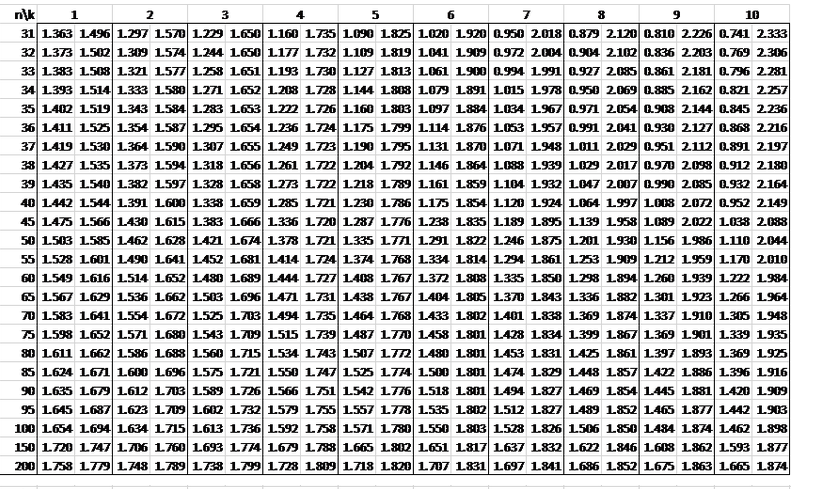

In [ ]:
from scipy import stats

resid = y - regression_values

n = len(resid)
numerator = sum([(resid[i] - resid[i - 1])**2 for i in range(1, n)])
denominator = sum(resid**2)

dw = numerator / denominator

alpha = 0.05  # ур. значимости
n = len(resid)
k = 2  # количество коэф. (a, b)

# критические значения (из таблицы)
critical_value_lower = 1.634
critical_value_upper = 1.715

# Вывод результатов
print("Тест Дарбина-Уотсона:")
print(f"Статистика теста (DW): {dw}")
print(f"Уровень значимости: {alpha}")
print(f'Количество регрессоров (объясняющие переменные): {k}')
print("Критическое значение (нижнее):", critical_value_lower)
print("Критическое значение (верхнее):", critical_value_upper)
# Проверка наличия (+) автокорреляции
if dw < critical_value_lower:
    print("Есть статистические доказательства положительной автокорреляции")
elif dw > critical_value_upper:
    print("Нет статистических доказательств положительной автокорреляции")
else:
    print("Тест не дает однозначного результата (неубедительный)")

# Проверка наличия (-) автокорреляции
if 4 - dw < critical_value_lower:
    print("Есть статистические доказательства отрицательной автокорреляции")
elif 4 - dw > critical_value_upper:
    print("Нет статистических доказательств отрицательной автокорреляции")
else:
    print("Тест не дает однозначного результата (неубедительный)")

Тест Дарбина-Уотсона:
Статистика теста (DW): 2.149606651759148
Уровень значимости: 0.05
Количество регрессоров (объясняющие переменные): 2
Критическое значение (нижнее): 1.634
Критическое значение (верхнее): 1.715
Нет статистических доказательств положительной автокорреляции
Нет статистических доказательств отрицательной автокорреляции


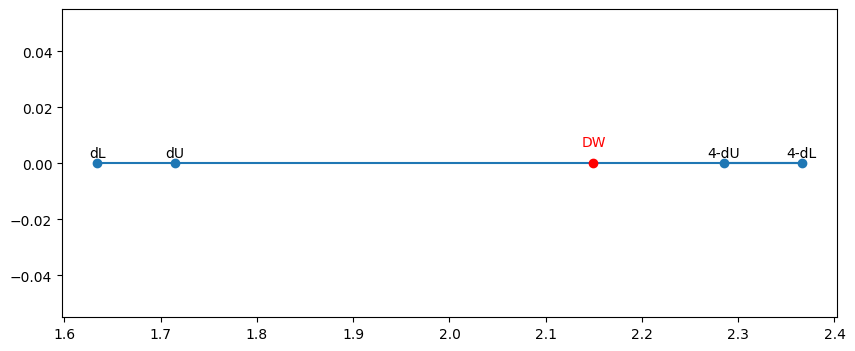

In [ ]:
x_values = [critical_value_lower, critical_value_upper, 4 - critical_value_lower, 4 - critical_value_upper]

# точки
plt.figure(figsize=(10, 4))
plt.plot(x_values, [0] * len(x_values), marker='o')
labels = ['dL', 'dU', '4-dL', '4-dU']

# подписи
for i in range(len(x_values)):
    plt.text(x_values[i], 0.001, labels[i], ha='center', va='bottom')

# dw красным
plt.plot(dw, 0, marker='o', color='red')
plt.text(dw, 0.005, 'DW', ha='center', va='bottom', color='red')
plt.show()

    Значение статистики близкое к 2 - отсутствие автокорреляции (независимость) остатков
    Значение близкое к 0 - положительная автокорреляция
    Значение близкое к 4 - отрицательная автокорреляция

### Проверка регрессионных значений и фактических данных ($R^2$)

In [ ]:
y_mean = np.mean(y)

# Рассчитываем сумму квадратов отклонений наблюдаемых значений от их среднего
ssr = np.sum((regression_values - y_mean)**2)

# Рассчитываем сумму квадратов отклонений фактических наблюдаемых значений от предсказанных
sse = np.sum((y - regression_values)**2)

r_squared = ssr / (ssr + sse)

print(f"R-squared: {r_squared}")

R-squared: 0.935140037356992


    Если R близок к 1, это означает, что модель хорошо соответствует данным, и предсказанные значения близки к фактическим данным.
    Если R близок к 0, это означает, что модель плохо соответствует данным, и предсказанные значения далеки от фактических данных.

# Экспонециальная регрессия:

$y=b * e^{ax}$ [(source)](https://real-statistics.com/regression/exponential-regression-models/exponential-regression/)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# создание данных
x = np.linspace(1, 5, 100)  # 100 значений от 1 до 5
a = 0.4
b = 1.2

y_t = b * np.exp(a * x)
# шум (epsilon из пары)
df = 3  # кол. степеней свободы
noise = np.random.standard_t(df, size=100)
scale = 0.3  # масштаб шума
y_noisy = y_t + scale * noise

x = x
y = y_noisy

In [ ]:
np.mean(noise)

-0.10207950989732303

In [ ]:
# Рассчет дисперсии
var_y_t = np.var(y_t)
var_noise = np.var(noise)
var_y = np.var(y)

print("Дисперсия y_t:", var_y_t)
print("Дисперсия noise:", var_noise)
print("Дисперсия y (y_t + noise):", var_y)

Дисперсия y_t: 4.099871322537269
Дисперсия noise: 2.0211016602285583
Дисперсия y (y_t + noise): 4.148657330145969


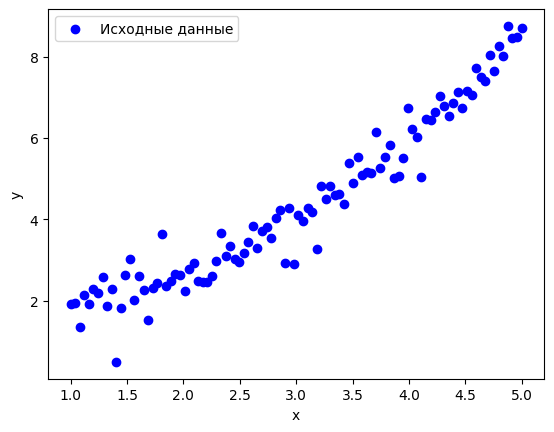

In [ ]:
plt.scatter(x, y, label='Исходные данные', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

a = 0.40901197917115595
b = 1.1457196973015376
Сумма квадратов ошибок = 18.450585155102722


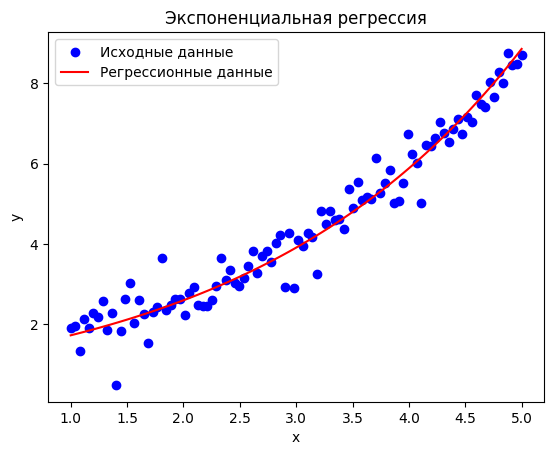

In [ ]:
from scipy.optimize import minimize

def loss(params):
    a, b = params
    da = 2 * np.sum((np.log(y) - np.log(b) - a * x) * (-x))
    db = -2 * np.sum(np.log(y) - np.log(b) - a * x)
    return da**2 + db**2

guess = [1.0, 1.0]

# минимизация функции потерь
result = minimize(loss, guess, method='L-BFGS-B')
a_opt, b_opt = result.x

# переопределение функции потерь, чтобы получить сумму квадратов ошибок
def loss(params):
    a, b = params
    predicted_y = b * np.exp(a * x)
    error = y - predicted_y
    return np.sum(error**2)

f_loss = loss([a_opt, b_opt])

print("a =", a_opt)
print("b =", b_opt)
print("Сумма квадратов ошибок =", f_loss)

regression_values = b_opt * np.exp(a_opt * x)

plt.scatter(x, y, label='Исходные данные', color='blue')
plt.plot(x, regression_values, label='Регрессионные данные', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Экспоненциальная регрессия')
plt.show()

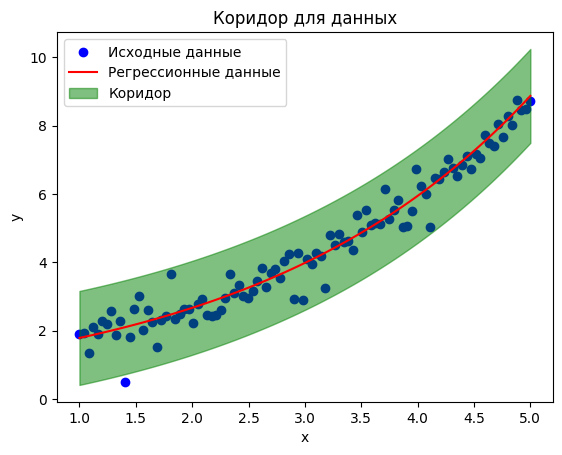

In [ ]:
from scipy.stats import norm

# ср. кв. отколнение
std_dev = np.std(y)
conf_level = 0.5 # 0.95

# квантили для верхней и нижней границы коридора
alpha = 1 - conf_level
upper_limit = y_t + std_dev * norm.ppf(1 - alpha / 2)
lower_limit = y_t - std_dev * norm.ppf(1 - alpha / 2)

plt.scatter(x, y, label='Исходные данные', color='blue')
plt.plot(x, y_t, label='Регрессионные данные', color='red', linestyle='-')
plt.fill_between(x, lower_limit, upper_limit, color='green', alpha=0.5, label='Коридор')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Коридор для данных')
plt.show()

### Тест Дарбина-Уотсона (Автокорреляция)


$ dw=\frac{\sum_{i=2}^{n}\left(e_i-e_{i-1}\right)^2}{\sum_{i=1}^{n}e_i^2} $

Ссылка на таблицу: https://real-statistics.com/statistics-tables/durbin-watson-table/

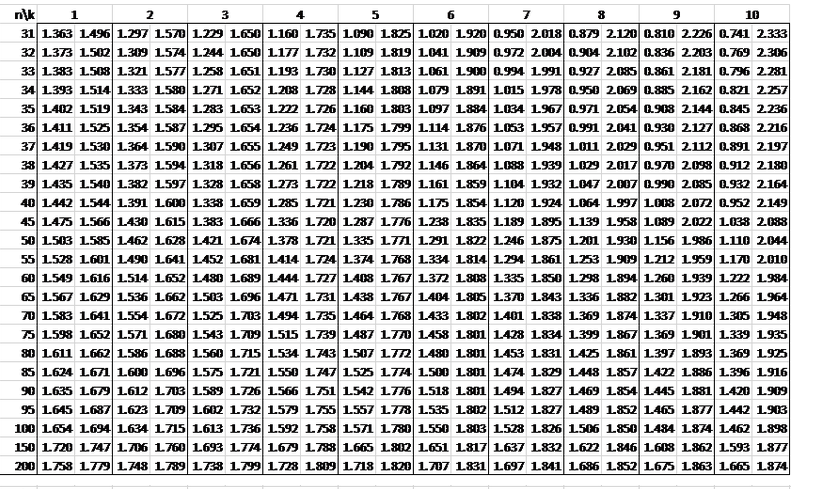

In [ ]:
from scipy import stats

resid = y - regression_values

n = len(resid)
numerator = sum([(resid[i] - resid[i - 1])**2 for i in range(1, n)])
denominator = sum(resid**2)

dw = numerator / denominator

alpha = 0.05  # ур. значимости
n = len(resid)
k = 2  # количество коэф. (a, b)

# критические значения (из таблицы)
critical_value_lower = 1.634
critical_value_upper = 1.715

# Вывод результатов
print("Тест Дарбина-Уотсона:")
print(f"Статистика теста (DW): {dw}")
print(f"Уровень значимости: {alpha}")
print(f'Количество регрессоров (объясняющие переменные): {k}')
print("Критическое значение (нижнее):", critical_value_lower)
print("Критическое значение (верхнее):", critical_value_upper)
# Проверка наличия (+) автокорреляции
if dw < critical_value_lower:
    print("Есть статистические доказательства положительной автокорреляции")
elif dw > critical_value_upper:
    print("Нет статистических доказательств положительной автокорреляции")
else:
    print("Тест не дает однозначного результата (неубедительный).")

# Проверка наличия (-) автокорреляции
if 4 - dw < critical_value_lower:
    print("Есть статистические доказательства отрицательной автокорреляции")
elif 4 - dw > critical_value_upper:
    print("Нет статистических доказательств отрицательной автокорреляции")
else:
    print("Тест не дает однозначного результата (неубедительный)")

Тест Дарбина-Уотсона:
Статистика теста (DW): 2.116512913519794
Уровень значимости: 0.05
Количество регрессоров (объясняющие переменные): 2
Критическое значение (нижнее): 1.634
Критическое значение (верхнее): 1.715
Нет статистических доказательств положительной автокорреляции
Нет статистических доказательств отрицательной автокорреляции


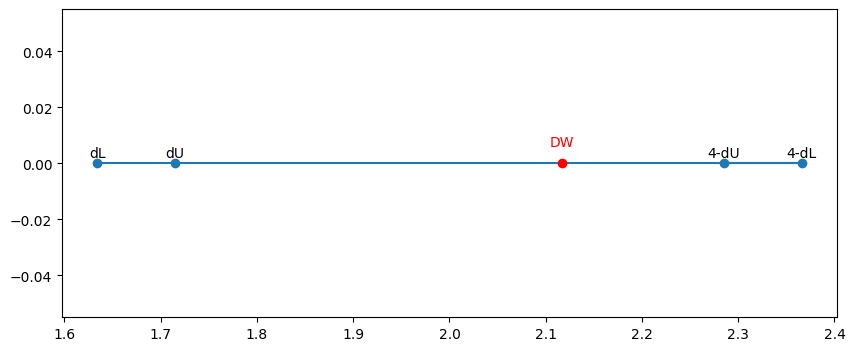

In [ ]:
x_values = [critical_value_lower, critical_value_upper, 4 - critical_value_lower, 4 - critical_value_upper]

# точки
plt.figure(figsize=(10, 4))
plt.plot(x_values, [0] * len(x_values), marker='o')
labels = ['dL', 'dU', '4-dL', '4-dU']

# подписи
for i in range(len(x_values)):
    plt.text(x_values[i], 0.001, labels[i], ha='center', va='bottom')

# dw красным
plt.plot(dw, 0, marker='o', color='red')
plt.text(dw, 0.005, 'DW', ha='center', va='bottom', color='red')
plt.show()

    Значение статистики близкое к 2 - отсутствие автокорреляции (независимость) остатков
    Значение близкое к 0 - положительная автокорреляция
    Значение близкое к 4 - отрицательная автокорреляция

### Проверка $R^2$:

In [ ]:
y_mean = np.mean(y)

# Рассчитываем сумму квадратов отклонений наблюдаемых значений от их среднего
ssr = np.sum((regression_values - y_mean)**2)

# Рассчитываем сумму квадратов отклонений фактических наблюдаемых значений от предсказанных
sse = np.sum((y - regression_values)**2)

r_squared = ssr / (ssr + sse)

print(f"R-squared: {r_squared}")

R-squared: 0.9575080274092004


    Если R близок к 1, это означает, что модель хорошо соответствует данным, и предсказанные значения близки к фактическим данным.
    Если R близок к 0, это означает, что модель плохо соответствует данным, и предсказанные значения далеки от фактических данных.

###### old

In [ ]:
import numpy as np

a, b = 1, 1

n = len(x)

# Линеаризация данных
ln_y = np.log(y)

# a
numerator_a = n * np.sum(x * ln_y) - np.sum(x) * np.sum(ln_y)
denominator_a = n * np.sum(x**2) - (np.sum(x))**2
a = numerator_a / denominator_a

# ln(b)
ln_b = (np.sum(ln_y) - a * np.sum(x)) / n

# Вычисление b из ln(b)
b = np.exp(ln_b)

print("Оптимальное a:", a)
print("Оптимальное b:", b)

Оптимальное a: 0.3969623081894436
Оптимальное b: 1.2148766437460445


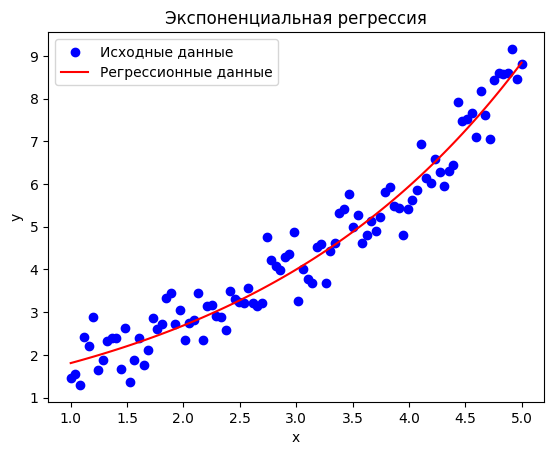

In [ ]:
# Функция для регрессионных значений
def regression_function(x, a, b):
    return b * np.exp(a * x)

# Регрессионные значения
regression_values = regression_function(x, a, b)

# Построение графика
plt.scatter(x, y, label='Исходные данные', color='blue')
plt.plot(x, regression_values, label='Регрессионные данные', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Экспоненциальная регрессия')
plt.show()

In [ ]:
# Начальные значения a и b
a = np.float64(1.0)  # Использовать двойную точность для a и b
b = np.float64(1.0)
best_a = np.float64(0.0)
best_b = np.float64(0.0)

n = len(x)
min_loss = float('inf')  # инициализируем минимальную функцию потерь как бесконечность

a_values = np.linspace(-5, 5, 1000)  # Диапазон для a от -5 до 5
b_values = np.linspace(-5, 5, 1000)  # Диапазон для b от -5 до 5

for a in a_values:
    for b in b_values:
        if a == 0 or b == 0:
            continue

        y_pred = b * np.exp(a * x)

        # значение функции потерь
        S = np.sum((np.log(y) - np.log(b) - a * x)**2)

        if S < min_loss:
            min_loss = S
            best_a = a
            best_b = b

print("Оптимальное a:", best_a)
print("Оптимальное b:", best_b)

def regression_function(x, a, b):
    return b * np.exp(a * x)

regression_values = regression_function(x, best_a, best_b)

<ipython-input-94-d01034d512ca>:21: RuntimeWarning: invalid value encountered in log
  S = np.sum((np.log(y) - np.log(b) - a * x)**2)


Оптимальное a: 0.39539539539539525
Оптимальное b: 1.2162162162162158


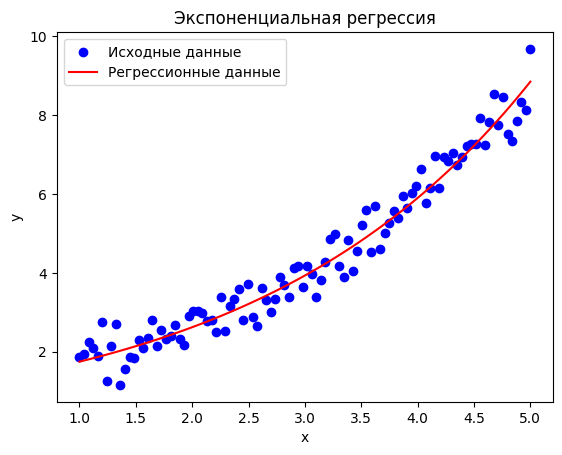

In [ ]:
# Построение графика
plt.scatter(x, y, label='Исходные данные', color='blue')
plt.plot(x, regression_values, label='Регрессионные данные', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Экспоненциальная регрессия')
plt.show()